In [3]:
#Import neccesary Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [4]:
#Reading the file
path="/content/drive/MyDrive/DIABETES DATASET/diabetes_unclean.csv"
df=pd.read_csv(path)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
#checking the columns
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [6]:
#Renaming column No_pation to Patients_NO
df.rename(columns={'No_Pation':'Patients_No'},inplace=True)

In [7]:
#Comfirming change in column
df.columns

Index(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [8]:
#check for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1009 non-null   int64  
 1   Patients_No  1009 non-null   int64  
 2   Gender       1009 non-null   object 
 3   AGE          1008 non-null   float64
 4   Urea         1008 non-null   float64
 5   Cr           1007 non-null   float64
 6   HbA1c        1006 non-null   float64
 7   Chol         1007 non-null   float64
 8   TG           1007 non-null   float64
 9   HDL          1008 non-null   float64
 10  LDL          1007 non-null   float64
 11  VLDL         1008 non-null   float64
 12  BMI          1009 non-null   float64
 13  CLASS        1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [9]:
#check for missing values
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          3
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [10]:
#Getting the mean_value
mean_value= df['HbA1c'].mean()
mean_value

8.284155069582505

In [11]:
#Replace with mean value
df['HbA1c'].fillna(mean_value,inplace=True)

In [12]:
#Comfirm change
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          0
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [13]:
#Drop the remaining missing valuea
df1=df.dropna()

In [14]:
#comfirm change
df1.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            0
Urea           0
Cr             0
HbA1c          0
Chol           0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
CLASS          0
dtype: int64

In [15]:
#checking agg for 'Class with the groupby method
df1.groupby('CLASS')['CLASS'].agg('count')

CLASS
N     102
N       1
P      53
Y     832
Y       9
Name: CLASS, dtype: int64

In [16]:
#checking for unique number for the column 'CLASS'
df1['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [17]:
#Replacing the unique value in order to clean the column
df1['CLASS']=df1['CLASS'].str.replace('Y ','Y')
df1['CLASS']=df1['CLASS'].str.replace('N ','N')

<ipython-input-17-218c2873e3f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLASS']=df1['CLASS'].str.replace('Y ','Y')
<ipython-input-17-218c2873e3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CLASS']=df1['CLASS'].str.replace('N ','N')


In [18]:
#To comfirm change
df1['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [19]:
#To check for statistical values
df1.describe()

,ID,Patients_No,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,997.000000,9.970000e+02,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,341.125376,2.724397e+05,53.606820,5.127325,68.755266,8.286372,4.862307,2.346048,1.205667,2.611123,1.857573,29.591795
std,240.479707,3.385816e+06,8.746421,2.944118,60.000956,2.538746,1.298706,1.398546,0.661317,1.116322,3.668713,4.960851
min,1.000000,1.230000e+02,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.000000,2.406300e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,302.000000,3.439400e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,551.000000,4.538400e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


<Axes: ylabel='Cr'>

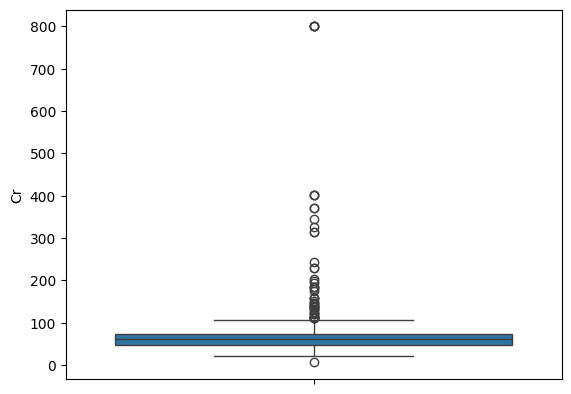

In [20]:
#Check for outliers
sns.boxplot(df1['Cr'])

In [21]:
#Using the maximum quantile to fill the outliers
max_cr = df1['Cr'].median()
max_cr

60.0

In [22]:
df1[df1['Cr']>max_cr]

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,735,34221,M,26.0,4.5,62.0,4.900000,3.7,1.4,1.1,2.1,0.6,23.0,N
8,670,34229,M,43.0,2.6,67.0,4.000000,3.8,0.9,2.4,3.7,1.0,21.0,N
15,566,34236,M,50.0,5.5,74.0,5.000000,3.6,1.1,1.0,2.1,0.5,21.0,N
20,64,34240,F,49.0,13.5,175.0,5.100000,0.5,1.9,1.3,2.8,0.8,24.0,N
21,97,12744,F,42.0,5.0,73.0,4.500000,6.2,1.0,1.1,4.6,0.4,24.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,669,87654,M,30.0,7.1,81.0,6.700000,4.1,1.1,1.2,2.4,8.1,27.4,Y
1000,185,454316,M,64.0,8.8,106.0,8.500000,5.9,2.1,1.2,4.0,1.2,32.0,Y
1002,188,454316,F,75.0,10.3,113.0,8.600000,4.2,1.6,0.9,2.6,0.7,32.0,Y
1005,192,454316,M,55.0,4.8,88.0,8.284155,5.7,4.0,0.9,3.3,1.8,30.0,Y


In [23]:
#assigning the data to a new dataframe
df2=df1[df1['Cr']<max_cr]

<Axes: ylabel='Cr'>

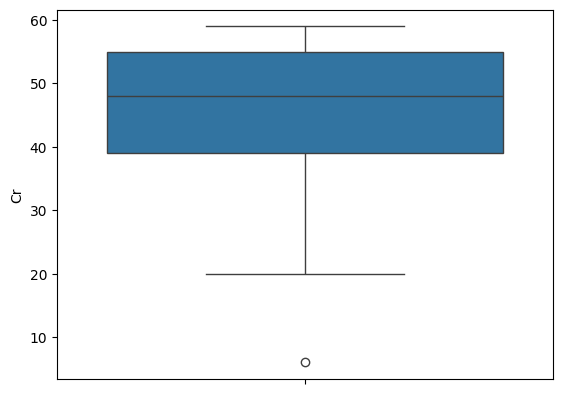

In [24]:
#To comfirm change
sns.boxplot(df2['Cr'])

<Axes: ylabel='AGE'>

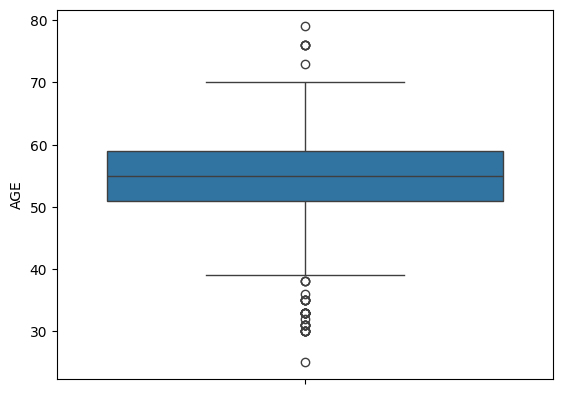

In [25]:
#Checking for outliers
sns.boxplot(df2['AGE'])

<Axes: ylabel='HbA1c'>

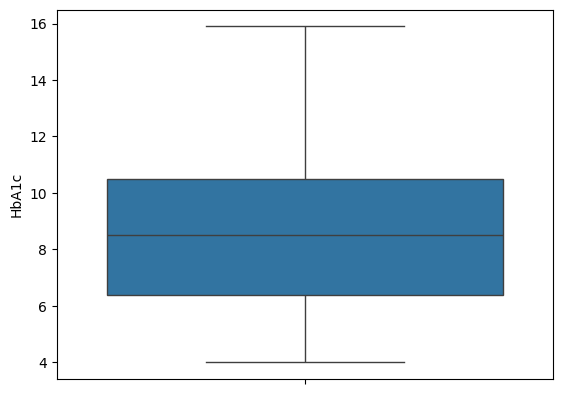

In [26]:
sns.boxplot(df2['HbA1c'])

<Axes: ylabel='Chol'>

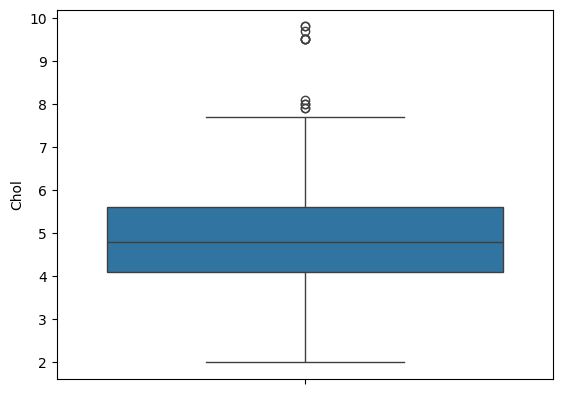

In [27]:
sns.boxplot(df2['Chol'])

In [28]:
#Checking for duplicates
df2.duplicated().sum()

2

In [29]:
#Drop dulicates
df3 = df2.drop_duplicates()

In [30]:
#To comfirm change
df3.duplicated().sum()

0

<Axes: title={'center': 'Age group of patients'}>

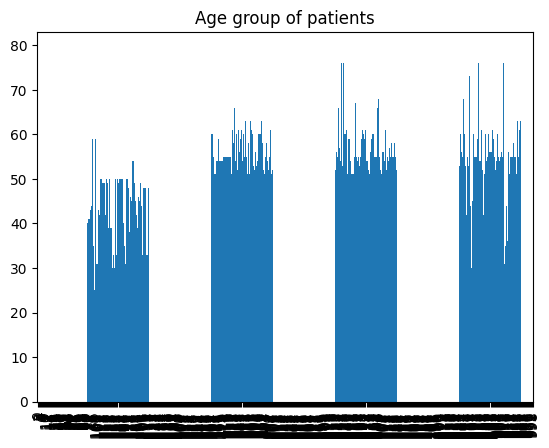

In [34]:
df3['AGE'].plot(kind='bar',title='Age group of patients')

In [35]:
#Save the cleaned dataset
df3.to_csv('Cleaned_Diabetes_dataset.csv',index=False)